--- Part A: PCA on Iris Dataset ---
Eigenvalues (variance explained by each component): [2.93808505 0.9201649 ]
Explained Variance Ratio: [0.72962445 0.22850762]
Total Variance Explained: 95.81%


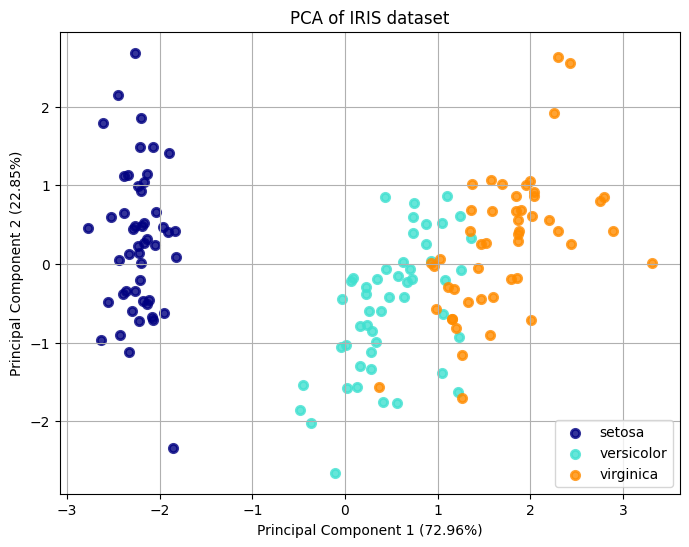


--- Part B: PCA vs Kernel PCA on Concentric Circles ---


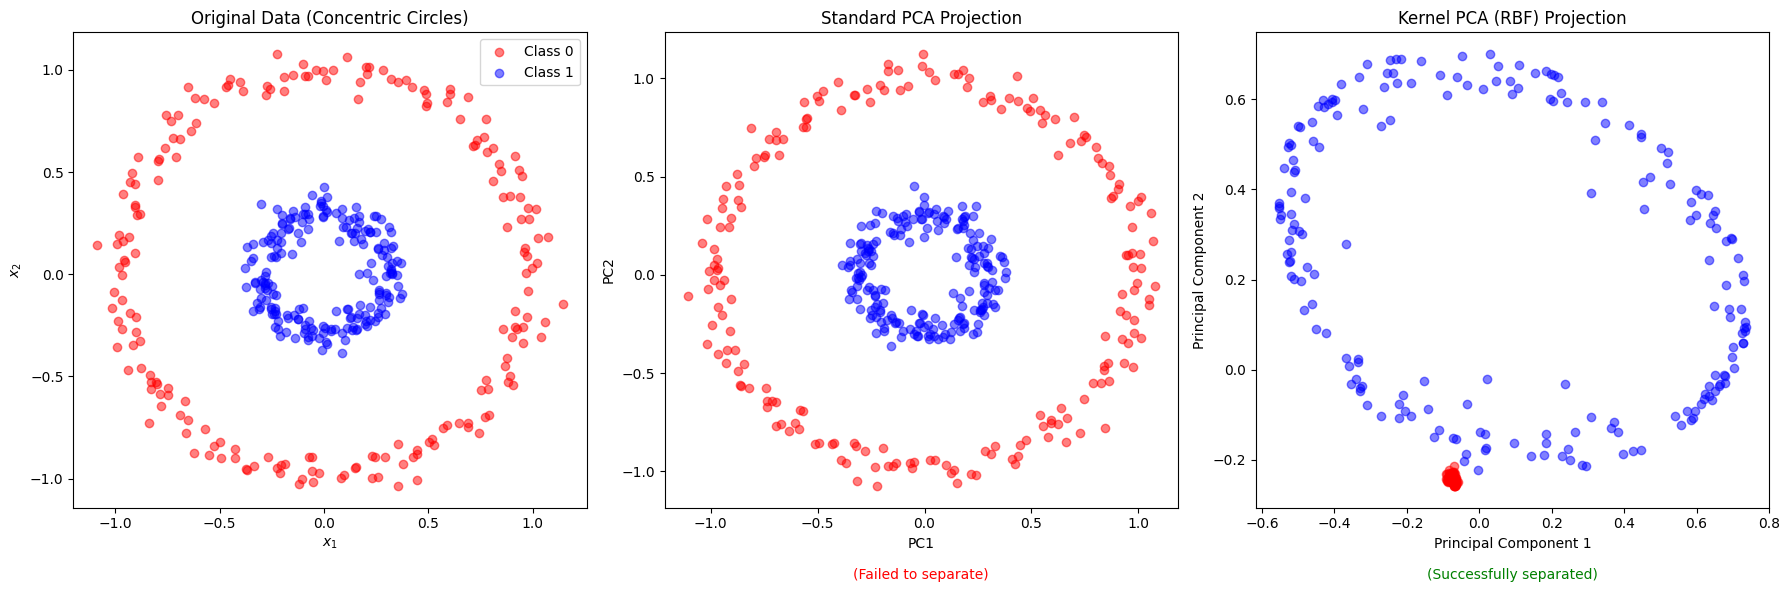

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_circles
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

# ==========================================
# PART A: PCA on the Iris Dataset
# ==========================================
def part_a_iris_pca():
    print("--- Part A: PCA on Iris Dataset ---")
    
    # 1. Load Data
    iris = load_iris()
    X = iris.data
    y = iris.target
    target_names = iris.target_names

    # 2. Standardize the Data (Important for PCA)
    # PCA is sensitive to scale; we must normalize to mean=0, variance=1
    X_std = StandardScaler().fit_transform(X)

    # 3. Apply PCA (Reduce 4D -> 2D)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)

    # 4. Compute Eigenvalues and Explained Variance
    eigenvalues = pca.explained_variance_
    variance_ratio = pca.explained_variance_ratio_

    print(f"Eigenvalues (variance explained by each component): {eigenvalues}")
    print(f"Explained Variance Ratio: {variance_ratio}")
    print(f"Total Variance Explained: {np.sum(variance_ratio) * 100:.2f}%")

    # 5. Visualize
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS dataset')
    plt.xlabel(f'Principal Component 1 ({variance_ratio[0]*100:.2f}%)')
    plt.ylabel(f'Principal Component 2 ({variance_ratio[1]*100:.2f}%)')
    plt.grid(True)
    plt.show()

# ==========================================
# PART B: PCA vs Kernel PCA on Nonlinear Data
# ==========================================
def part_b_circles_kpca():
    print("\n--- Part B: PCA vs Kernel PCA on Concentric Circles ---")

    # 1. Generate Data (Nested Circles)
    # factor=0.5 means the inner circle is half the size of the outer
    X, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

    # 2. Apply Standard PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # 3. Apply Kernel PCA (RBF Kernel)
    # Gamma controls the "width" of the kernel; it may need tuning.
    kpca = KernelPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X)

    # 4. Visualization Comparison
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Original Data
    ax1.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.5, label='Class 0')
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.5, label='Class 1')
    ax1.set_title("Original Data (Concentric Circles)")
    ax1.set_xlabel("$x_1$")
    ax1.set_ylabel("$x_2$")
    ax1.legend()

    # Standard PCA Result
    ax2.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', alpha=0.5)
    ax2.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', alpha=0.5)
    ax2.set_title("Standard PCA Projection")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.text(0.5, -0.15, "(Failed to separate)", transform=ax2.transAxes, ha='center', color='red')

    # Kernel PCA Result
    ax3.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', alpha=0.5)
    ax3.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', alpha=0.5)
    ax3.set_title("Kernel PCA (RBF) Projection")
    ax3.set_xlabel("Principal Component 1")
    ax3.set_ylabel("Principal Component 2")
    ax3.text(0.5, -0.15, "(Successfully separated)", transform=ax3.transAxes, ha='center', color='green')

    plt.tight_layout()
    plt.show()

# Run the functions
if __name__ == "__main__":
    part_a_iris_pca()
    part_b_circles_kpca()